<a href="https://colab.research.google.com/github/GemmaRea/Analisi-E-commerce/blob/main/csv_da_bigQuery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

project = 'avid-rope-3333' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=avid-rope-3333:US:bquxjob_679c8932_1892d07e3fa)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_679c8932_1892d07e3fa') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT id, created_at, city, state, browser, user_id, traffic_source, event_type
 FROM `bigquery-public-data.thelook_ecommerce.events`


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

query_eventi = """
        SELECT id, created_at, city, state, browser, user_id, traffic_source, event_type
        FROM `bigquery-public-data.thelook_ecommerce.events`
        """
eventi = client.query(query_eventi).to_dataframe()
# eventi.to_csv("eventi.csv",index = False)
# files.download("eventi.csv")
eventi.isnull().sum()


id                      0
created_at              0
city                    0
state                   0
browser                 0
user_id           1124842
traffic_source          0
event_type              0
dtype: int64

KeyboardInterrupt: ignored

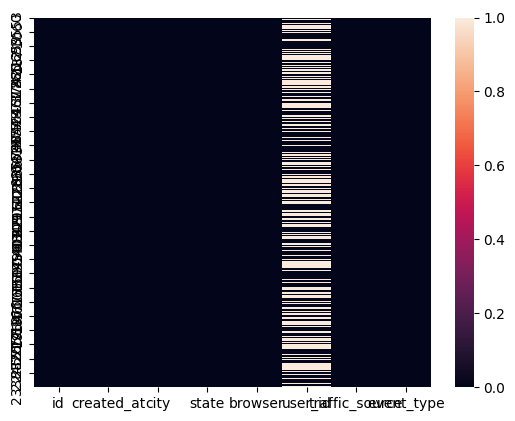

In [ ]:
sns.heatmap(eventi.isnull())
plt.show()

## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

csv_inventario

In [ ]:
query_inventario =  """
                  SELECT id, product_id, created_at, sold_at, cost, product_category, product_name,
                  product_retail_price, product_department, product_distribution_center_id
                  FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
                  """
inventario = client.query(query_inventario).to_dataframe()
inventario.isnull().sum()
inventario.to_csv("inventario.csv",index = False)
files.download("inventario.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sns.heatmap(inventario.isnull())
plt.show()

csv_centri_distribuzione

In [ ]:
query_centri_distribuzione = """
                            SELECT *
                            FROM `bigquery-public-data.thelook_ecommerce.distribution_centers`
                            """
centri_distribuzione = client.query(query_centri_distribuzione).to_dataframe()
centri_distribuzione
# centri_distribuzione.to_csv("centri_distribuzione.csv",index = False)
# files.download("centri_distribuzione.csv")

csv_ordini_prodotto

In [ ]:
query_ordini_prodotto =  """
                  SELECT *
                  FROM `bigquery-public-data.thelook_ecommerce.order_items`
                  """
ordini_prodotti = client.query(query_ordini_prodotto).to_dataframe()
ordini_prodotti.isnull().sum()
# ordini_prodotti.to_csv("ordini_prodotti.csv",index = False)
# files.download("ordini_prodotti.csv")

In [ ]:
sns.heatmap(ordini_prodotti.isnull())
plt.show()

csv_utenti

In [ ]:
query_utenti = """
               SELECT id, age, gender, state, city, country, latitude, longitude, created_at
              FROM `bigquery-public-data.thelook_ecommerce.users`
              """
utenti = client.query(query_utenti).to_dataframe()
utenti.isnull().sum()
# utenti.to_csv("utenti.csv",index = False)
# files.download("utenti.csv")

csv_ordini

In [ ]:
query_ordini = """
              SELECT order_id, user_id, num_of_item
              FROM `bigquery-public-data.thelook_ecommerce.orders`
              """
ordini = client.query(query_ordini).to_dataframe()
ordini.isnull().sum()
# ordini.to_csv("ordini.csv",index = False)
# files.download("ordini.csv")

csv_prodotti

In [ ]:
query_prodotti = """
                SELECT *
                FROM `bigquery-public-data.thelook_ecommerce.products`
                """
prodotti = client.query(query_prodotti).to_dataframe()
prodotti.head()
# prodotti.to_csv("prodotti.csv",index = False)
# files.download("prodotti.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sns.heatmap(prodotti.isnull())
plt.show()

csv_minorenni

In [ ]:
query_minorenni = """
                            SELECT *
FROM `avid-rope-3333.csv.eventi_utenti_joinati`
WHERE age <18

                            """
minorenni = client.query(query_minorenni).to_dataframe()
minorenni
minorenni.isnull().sum()
# minorenni.to_csv("minorenni.csv",index = False)
# files.download("minorenni.csv")

id                 0
user_id            0
sequence_number    0
session_id         0
created_at         0
ip_address         0
city               0
state              0
postal_code        0
browser            0
traffic_source     0
uri                0
event_type         0
age                0
dtype: int64

csv_18-40

In [ ]:
query_adulti = """
                            SELECT *
FROM `avid-rope-3333.csv.eventi_utenti_joinati`
WHERE age >17 and age<40

                            """
adulti = client.query(query_adulti).to_dataframe()
adulti
adulti.isnull().sum()
# adulti.to_csv("adulti.csv",index = False)
# files.download("adulti.csv")

id                 0
user_id            0
sequence_number    0
session_id         0
created_at         0
ip_address         0
city               0
state              0
postal_code        0
browser            0
traffic_source     0
uri                0
event_type         0
age                0
dtype: int64

csv_40-50

In [ ]:
query_senior = """
                            SELECT *
FROM `avid-rope-3333.csv.eventi_utenti_joinati`
WHERE age >39 and age <50
                           """
senior = client.query(query_senior).to_dataframe()
senior
senior.isnull().sum()
# senior.to_csv("senior.csv",index = False)
# files.download("senior.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

csv_40-50


In [ ]:
query_senior_plus_plus = """
                            SELECT *
FROM `avid-rope-3333.csv.eventi_utenti_joinati`
WHERE age >39 and age <50
                           """
senior_plus = client.query(query_senior_plus_plus).to_dataframe()
senior_plus
senior_plus.isnull().sum()
# senior_plus.to_csv("senior_plus.csv",index = False)
# files.download("senior_plus.csv")